In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import time
# import plotly.graph_objects as go

In [2]:
data = pd.read_csv("data/CADJPY_M1201911/DAT_ASCII_CADJPY_M1_201911.csv", delimiter=";",header=None)
#data = pd.read_csv("data/CADJPY_M1201910/DAT_ASCII_CADJPY_M1_201910.csv", delimiter=";",header=None)

In [3]:
data.columns = ["timestamp","open","high","low","close","volume"]

In [4]:
data.head()

,timestamp,open,high,low,close,volume
0,20191101 000000,82.104,82.107,82.100,82.100,0
1,20191101 000100,82.102,82.102,82.096,82.098,0
2,20191101 000200,82.098,82.107,82.098,82.104,0
3,20191101 000300,82.104,82.106,82.103,82.104,0
4,20191101 000400,82.102,82.104,82.096,82.098,0


In [5]:
data.timestamp = pd.to_datetime(data.timestamp)

In [6]:
# fig = go.Figure(data=[go.Candlestick(x=data[:200]['timestamp'],
#                 open=data['open'],
#                 high=data['high'],
#                 low=data['low'],
#                 close=data['close'])])
# fig.update_layout(xaxis_rangeslider_visible=False)
# fig.show()

In [7]:
data.timestamp.head()
import matplotlib.dates as dates


In [8]:
# _ , ax1 = plt.subplots()
# quotes = [tuple([dates.date2num(data.timestamp[i]),data.open[i],data.high[i],data.low[i],data.close[i]]) for i in range(200)]

# candlestick_ohlc(ax1,quotes)

In [9]:
# Variance test
h = 10
def compute_lagged_variance(series,lag):
    sample_size = series.shape[0]
    lagging_return = np.zeros(sample_size-lag)
    sample = series[lag:sample_size]
    lagging_return = sample.values - series[:sample_size-lag].values
    return np.var(lagging_return)

def compute_var_ratio(series,lag):
    sample_size = series.shape[0]
    lagging_return = np.zeros(sample_size-lag)
    sample = series[lag:sample_size]
    lagging_return = sample.values - series[:sample_size-lag].values
    lagged_var = np.var(lagging_return)
    # Using same size sample to compute lag one variance
    var_one = np.var(sample.values - series[lag-1:sample_size-1])
    return lagged_var / var_one
    
print(compute_lagged_variance(data.open[:100],h))
print(compute_lagged_variance(data.open[:100],1))
print(compute_lagged_variance(data.open[:100],h)/compute_lagged_variance(data.open[:100],1))
print(compute_var_ratio(data.open[:100],h))

0.00019348691358028064
2.296928884808249e-05
8.423722426061667
8.080701627746768


In [10]:
window_size = 100
total_size = len(data)
h = 10
var_ratio_lst = []
var_ratio_corrected_lst = []
start = time.time()

for i in range(total_size-window_size):
    series = data.open[i:i+window_size]
    #var_h = compute_lagged_variance(series,h)
    #var_one = compute_lagged_variance(series,1)
    #var_ratio_lst.append(var_h/var_one)
    var_ratio_corrected_lst.append(compute_var_ratio(series,h))

print("temps de calcul ", time.time()-start)

print(var_ratio_corrected_lst[0],var_ratio_corrected_lst[-1], len(var_ratio_corrected_lst))


temps de calcul 19.96174669265747
8.080701627746768 2.6680280716740428 29647


In [11]:
start = time.time()
# Autre implémentation vectorisée
vec = data.open.values
# Tableau des indices par broadcasting
idx =  np.arange(vec.shape[0]-window_size+1)[:,None] +np.arange(window_size)
# Application d'une fonction par lignes
res = vec[idx]
print(res.shape)
lagging_h_var = np.var(res[:,h:res.shape[1]] - res[:,:res.shape[1]-h] ,axis = 1)
lagging_one_var = np.var(res[:,h:res.shape[1]] - res[:,h-1:res.shape[1]-1] ,axis = 1)
var_ratio = lagging_h_var / lagging_one_var
print("temps de calcul ",time.time()-start)
print(np.max(var_ratio),np.min(var_ratio), len(var_ratio))
print(var_ratio[0],var_ratio[-1], len(var_ratio))

(29648, 100)
temps de calcul  0.09199881553649902
35.45239234351474 1.4578200540817847 29648
8.080701627746768 1.942696334481268 29648


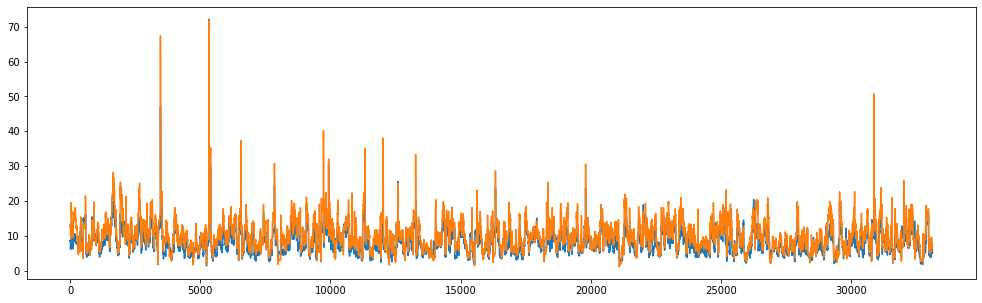

In [87]:
plt.figure(figsize=(17,5))
#plt.plot(var_ratio_lst)
plt.plot(var_ratio_corrected_lst)
plt.plot(var_ratio)
plt.plot(np.ones(len(var_ratio_lst))*h,'r')

(array([3.800e+01, 4.400e+01, 1.500e+02, 3.060e+02, 4.430e+02, 5.920e+02,
        5.250e+02, 7.100e+02, 8.740e+02, 9.880e+02, 1.101e+03, 1.176e+03,
        1.191e+03, 1.285e+03, 1.382e+03, 1.410e+03, 1.237e+03, 1.187e+03,
        1.257e+03, 1.202e+03, 1.083e+03, 1.149e+03, 1.106e+03, 9.450e+02,
        8.590e+02, 8.210e+02, 7.430e+02, 6.910e+02, 6.490e+02, 5.730e+02,
        5.260e+02, 4.000e+02, 4.160e+02, 3.790e+02, 3.030e+02, 2.830e+02,
        2.180e+02, 1.630e+02, 1.740e+02, 1.410e+02, 9.600e+01, 6.700e+01,
        7.200e+01, 5.700e+01, 4.600e+01, 4.100e+01, 2.900e+01, 4.400e+01,
        3.900e+01, 2.800e+01, 2.600e+01, 2.100e+01, 3.400e+01, 3.100e+01,
        1.900e+01, 2.400e+01, 2.600e+01, 3.900e+01, 1.800e+01, 1.400e+01,
        2.300e+01, 2.400e+01, 1.200e+01, 1.500e+01, 9.000e+00, 9.000e+00,
        0.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        7.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 5.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 9.000e+0

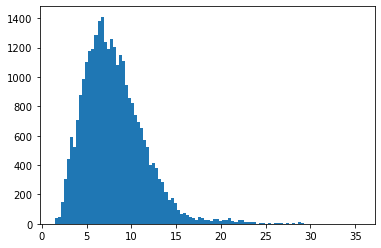

In [106]:
plt.hist(var_ratio, bins=100)

In [84]:
np.mean(var_ratio)

8.156351245958795

In [70]:
np.mean(var_ratio_corrected_lst)


8.09397184408386

# Next steps

Essayer avec H,L,C, une moyenne des 4

Essayer sur 5mn, 1H,4H,1D

Faire le lien avec le price action

Essayer d'autres mois

Essayer d'autres actifs


In [123]:
# Avec données 1D
data_1D = pd.read_csv("data/CAD_JPY_daily.csv", delimiter=",",decimal=",")


In [124]:
data_1D.shape

(5000, 6)

In [125]:
data_1D.columns

Index(['Date', 'Dernier', 'Ouv.', 'Plus Haut', 'Plus Bas', 'Variation %'], dtype='object')

In [126]:
data_1D.columns = ['date','close','open','high','low','pctvar']

In [127]:
data_1D_reverse = data_1D.iloc[::-1]

In [128]:
data_1D_reverse.head()

,date,close,open,high,low,pctvar
4999,03/01/2000,70.24,70.60,70.69,70.06,"-0,68%"
4998,04/01/2000,71.13,70.08,71.32,70.04,"1,27%"
4997,05/01/2000,71.95,71.04,72.08,70.60,"1,15%"
4996,06/01/2000,72.15,71.90,72.37,71.66,"0,28%"
4995,07/01/2000,72.36,72.10,72.54,71.76,"0,29%"


In [130]:
data_1D_reverse[['close','open','high','low']] = data_1D_reverse[['close','open','high','low']].astype(float)

In [140]:
window_size = 100
h = 20
start = time.time()
# Autre implémentation
vec = data_1D_reverse.open.values
# Tableau des indices par broadcasting
idx =  np.arange(vec.shape[0]-window_size+1)[:,None] +np.arange(window_size)
# Application d'une fonction par lignes
res = vec[idx]
print(res.shape)
lagging_h_var = np.var(res[:,h:res.shape[1]] - res[:,:res.shape[1]-h] ,axis = 1)
lagging_one_var = np.var(res[:,h:res.shape[1]] - res[:,h-1:res.shape[1]-1] ,axis = 1)
var_ratio = lagging_h_var / lagging_one_var
print(time.time()-start)
print(np.max(var_ratio),np.min(var_ratio), len(var_ratio),np.mean(var_ratio))
print(var_ratio[0],var_ratio[-1], len(var_ratio))

(4901, 100)
0.00800323486328125
42.453335073170884 2.228176696518229 4901 14.374236379953949
16.301411541364832 15.025388292593414 4901


(array([ 12.,  14.,   8.,  36.,  44.,  20.,  40.,  85., 133.,  89.,  80.,
         94.,  90.,  99.,  96., 138., 128., 149., 175., 164., 109., 124.,
        123., 110., 163., 142., 108., 121.,  78., 110.,  77.,  96.,  92.,
         89.,  92.,  77.,  67.,  81.,  66.,  72.,  66.,  68.,  60.,  48.,
         58.,  52.,  51.,  42.,  42.,  54.,  32.,  36.,  23.,  21.,  17.,
         20.,  21.,  22.,  21.,  37.,  24.,  24.,  23.,  26.,  25.,  26.,
         19.,  20.,  16.,  15.,  16.,  15.,  20.,  13.,  12.,  14.,  14.,
         10.,   5.,   8.,   5.,   6.,   6.,   4.,   4.,   6.,  10.,   5.,
          3.,   2.,   0.,   3.,   2.,   3.,   5.,   3.,   4.,   0.,   1.,
          2.]),
 array([ 2.2281767 ,  2.63042828,  3.03267986,  3.43493145,  3.83718303,
         4.23943462,  4.6416862 ,  5.04393778,  5.44618937,  5.84844095,
         6.25069253,  6.65294412,  7.0551957 ,  7.45744729,  7.85969887,
         8.26195045,  8.66420204,  9.06645362,  9.4687052 ,  9.87095679,
        10.27320837, 10.67

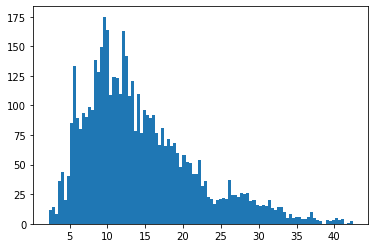

In [141]:
plt.hist(var_ratio,bins = 100)

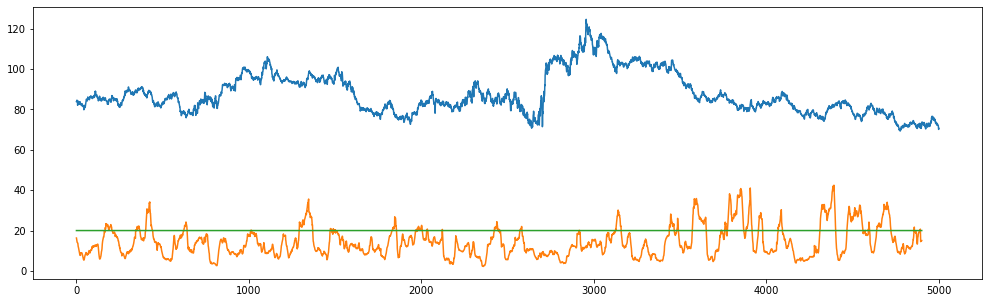

In [142]:
plt.figure(figsize=(17,5))
plt.plot(data_1D.open)
plt.plot(var_ratio)
plt.plot(np.ones(len(var_ratio))*h)

In [136]:
len(var_ratio)

4901

In [143]:
# DAX Daily
dax_1D = pd.read_csv('data/GDAXI.csv',delimiter=',')

In [144]:
dax_1D.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,6961.720215,7159.330078,6720.870117,6750.759766,6750.759766,43072500.0
1,2000-01-04,6747.240234,6755.359863,6510.459961,6586.950195,6586.950195,46678400.0
2,2000-01-05,6585.850098,6585.850098,6388.910156,6502.069824,6502.069824,52682800.0
3,2000-01-06,6501.450195,6539.310059,6402.629883,6474.919922,6474.919922,41180600.0
4,2000-01-07,6489.939941,6791.529785,6470.140137,6780.959961,6780.959961,56058900.0


In [161]:
dax_1D.isna()
len(dax_1D) - dax_1D.Close.count()
dax_1D_clean = dax_1D.dropna()

In [166]:
window_size = 200
h = 50
start = time.time()
# Autre implémentation
vec = dax_1D_clean.Open.values
# Tableau des indices par broadcasting
idx =  np.arange(vec.shape[0]-window_size+1)[:,None] +np.arange(window_size)
# Application d'une fonction par lignes
res = vec[idx]
print(res.shape)
lagging_h_var = np.var(res[:,h:res.shape[1]] - res[:,:res.shape[1]-h] ,axis = 1)
lagging_one_var = np.var(res[:,h:res.shape[1]] - res[:,h-1:res.shape[1]-1] ,axis = 1)
var_ratio = lagging_h_var / lagging_one_var
print(time.time()-start)
print(np.max(var_ratio),np.min(var_ratio), len(var_ratio),np.mean(var_ratio))
print(var_ratio[0],var_ratio[-1], len(var_ratio))

(4874, 200)
0.029248714447021484
80.51062960090323 6.708616402850123 4874 30.102016789455725
24.747086429795164 30.5510277437459 4874


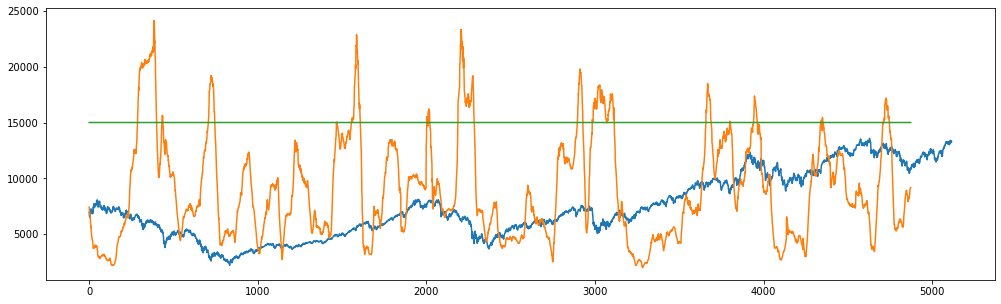

In [167]:
plt.figure(figsize=(17,5))
plt.plot(dax_1D_clean.Open)
plt.plot(var_ratio*300)
plt.plot(np.ones(len(var_ratio))*h*300)

Next steps

Essayer avec H,L,C, une moyenne des 4

Essayer sur 5mn, 1H,4H,1D

Faire le lien avec le price action

Essayer d'autres mois

Essayer d'autres actifs